<a href="https://colab.research.google.com/github/AmitK830/Machine-Learning-Projects/blob/main/Telecommunication_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Import metrics from Sklearn

from sklearn.metrics import roc_auc_score,log_loss,classification_report,roc_curve,precision_score,recall_score
from sklearn.model_selection import train_test_split

# Import Supervised algorithms from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Import Boosting Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

# Random SearchCV 
from sklearn.model_selection import RandomizedSearchCV

## Description of Projects
### Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

### Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

### You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

### The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

### 1. Description of the data (with the calculation of basic statistics);
#### 2. Research of dependencies and formulation of hypotheses;
### 3. Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
### 4. Comparison of the quality of the obtained models.


## Load the dataset and check some of rows visually

In [2]:
df = pd.read_csv("/content/telecom_users.csv",index_col=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


## Data Dictionary

### customerID - customer id
### gender - client gender (male / female)
### SeniorCitizen - is the client retired (1, 0)
### Partner - is the client married (Yes, No)
### tenure - how many months a person has been a client of the company
### PhoneService - is the telephone service connected (Yes, No)
### MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
### InternetService - client's Internet service provider (DSL, Fiber optic, No)
### OnlineSecurity - is the online security service connected (Yes, No, No internet service)
### OnlineBackup - is the online backup service activated (Yes, No, No internet service)
### DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
### TechSupport - is the technical support service connected (Yes, No, No internet service)
### StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
### StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
### Contract - type of customer contract (Month-to-month, One year, Two year)
### PaperlessBilling - whether the client uses paperless billing (Yes, No)
### PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
### MonthlyCharges - current monthly payment
### TotalCharges - the total amount that the client paid for the services for the entire time
### Churn - whether there was a churn (Yes or No)

## Check the Shape

In [ ]:
print(df.shape)

(5986, 21)


## Check the datatype

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## Check the percentage of missing values inside the dataset

In [ ]:
print(round(df.isnull().sum()/len(df)*100, 4))

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


### As we can see there is no NULL values in the dataset

## Convert the datatype of totalcharges into float. But problem is contians some whitespace

## Let's findout which columns contains whitespace

In [3]:
count= 0 
for feature in df.columns:
  if df[df[feature]== ' '][feature].nunique() == 1:
    count= count +1 
    print("{} :".format(feature), count)

TotalCharges : 1


### As we can see totalcharges column contains whitespace. I will replace them with the median values

In [4]:
df['TotalCharges'] = df['TotalCharges'].str.replace(" ", '0')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'] = np.where(df['TotalCharges'] == 0, df['TotalCharges'].median(), df['TotalCharges'])

## Check for the duplicates rows





In [5]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### No duplicate rows in the dataset

## I will do EDA to find to find some insight in the dataset

## Extract the Categorical & Numerical variables in the dataset

In [6]:
cat_val =[x for x in df.columns if df[x].nunique()< 25]
num_val = [x for x in df.columns if x not in cat_val and x not in ['customerID']]


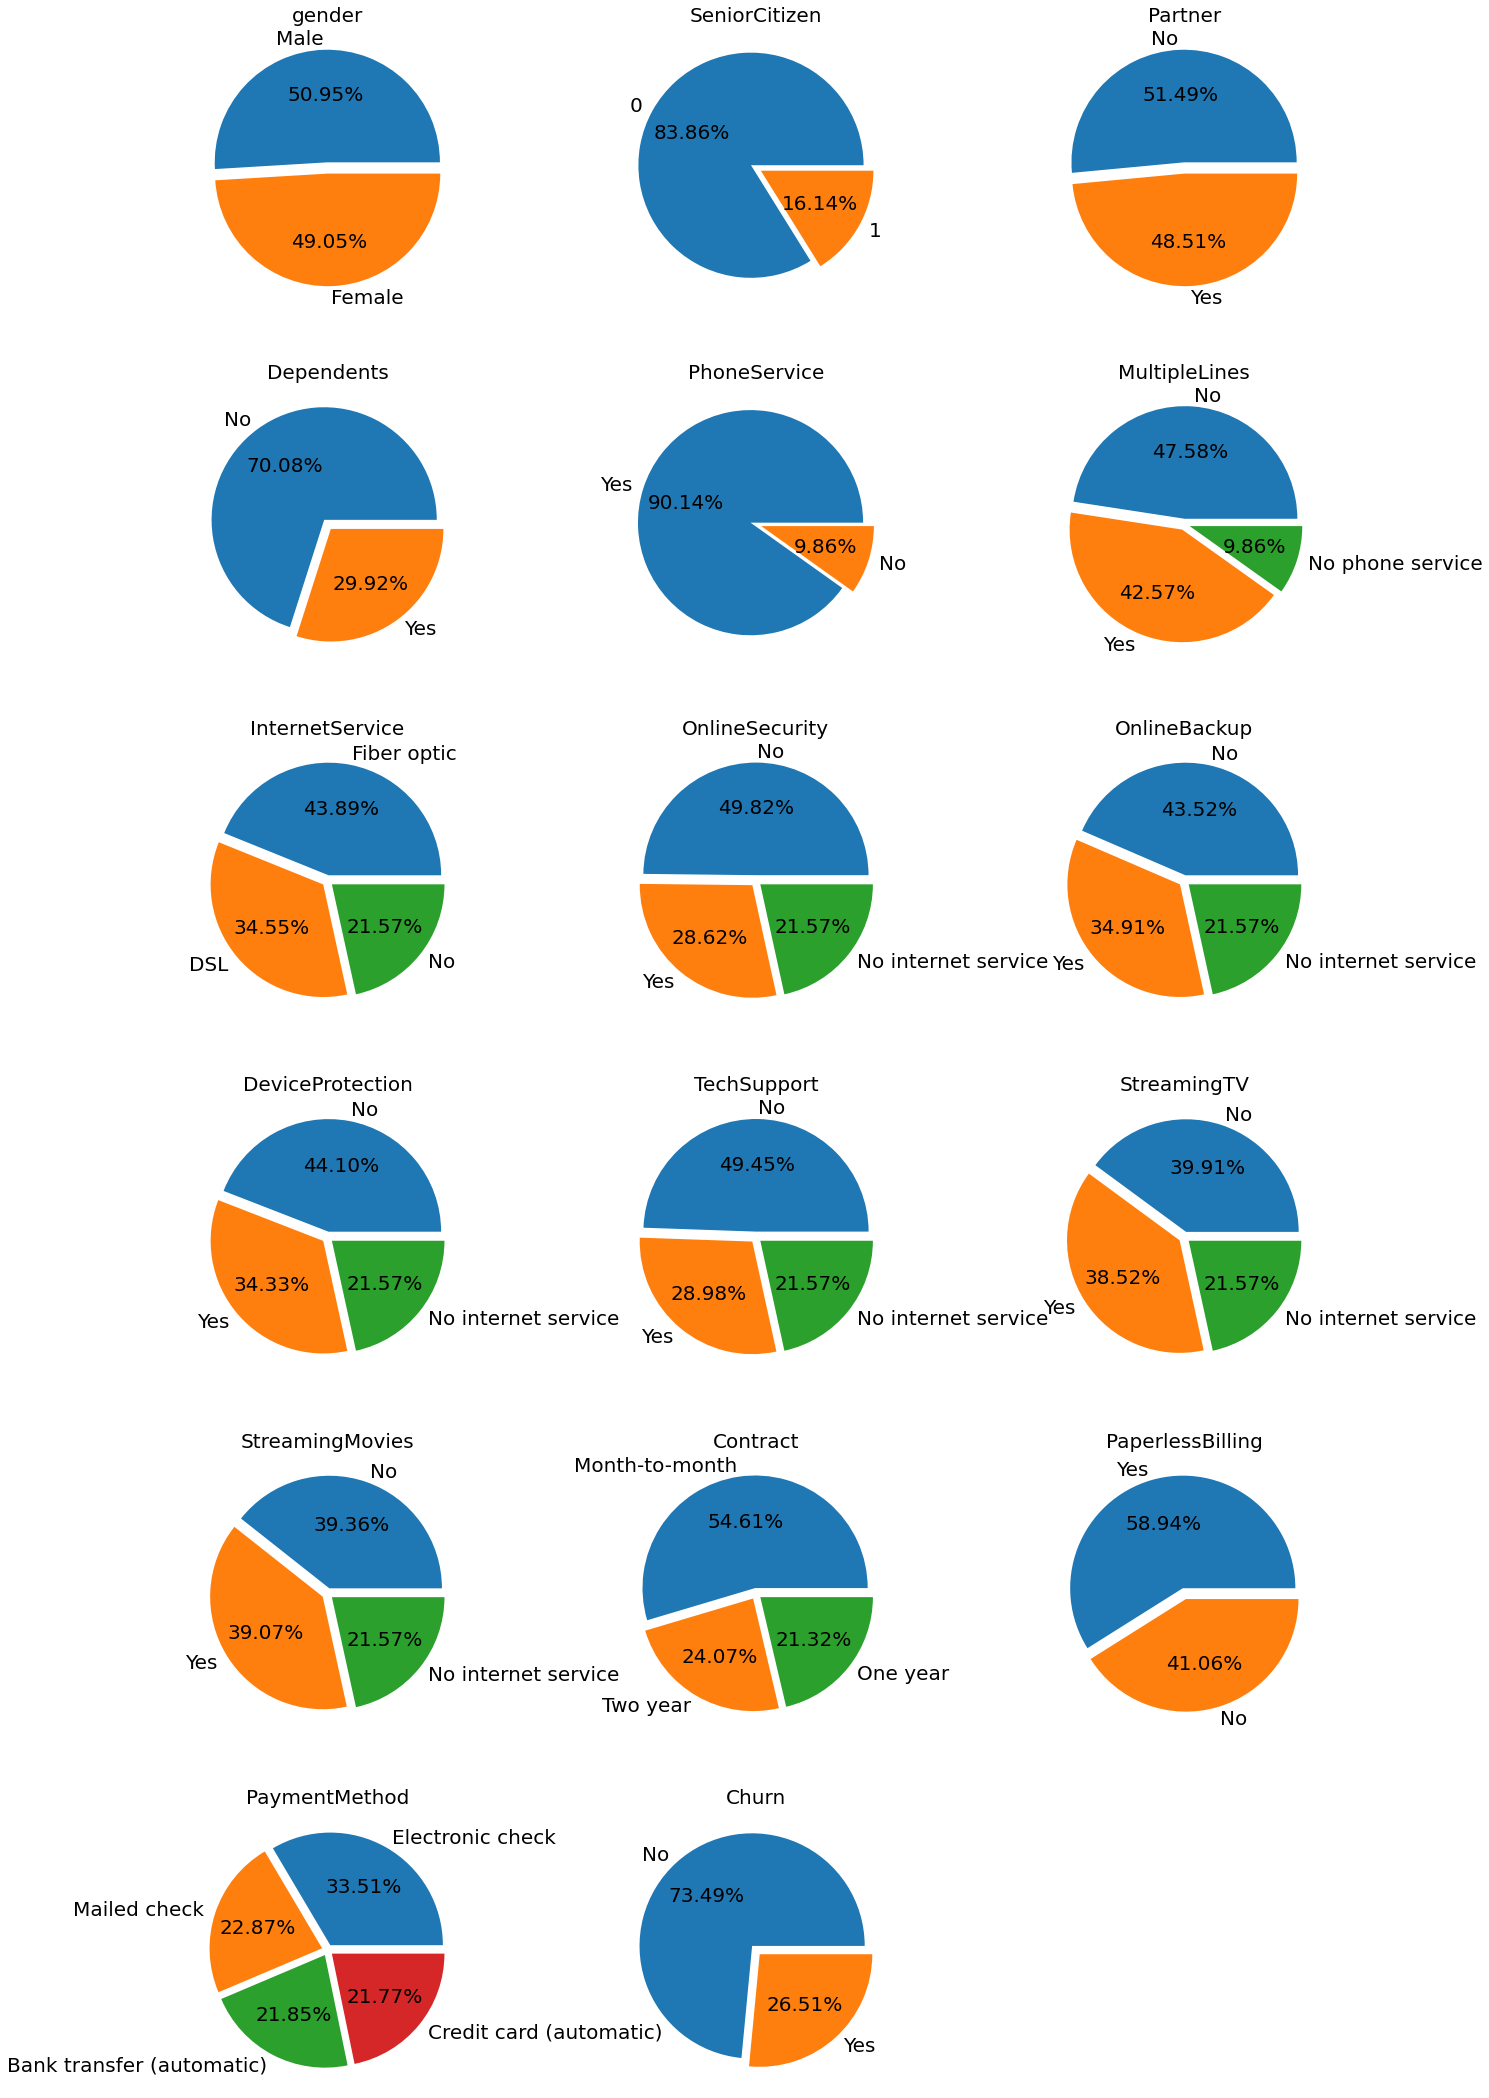

In [ ]:
import matplotlib as mpl
n =1
plt.figure(figsize=(20,30))
for feature in cat_val:
  plt.subplot(6,3,n)
  mpl.rcParams['font.size'] =20
  exp = [0.05 for y in range(df[feature].nunique())]
  plt.pie(df[feature].value_counts(),autopct='%.2f%%',labels=df[feature].value_counts().index,explode=exp,);
  plt.title(feature,size=20);
  n =n +1

plt.tight_layout()
plt.show()

## From the above Pie plot I can conclude that:--
### Maximum people are not retired
### 48% people are married
### Only 20% of people haven't connected to internet
### 50% of people haven't connected to online security
### 40% of people doen't have streaming service and 20 % doen't have internet service
### More than 50% customers pay internet bills Month to Month
### 40% of the people doen't do paperless billing
### 73% of customer have't churned 

## Visualizing the Numerical features

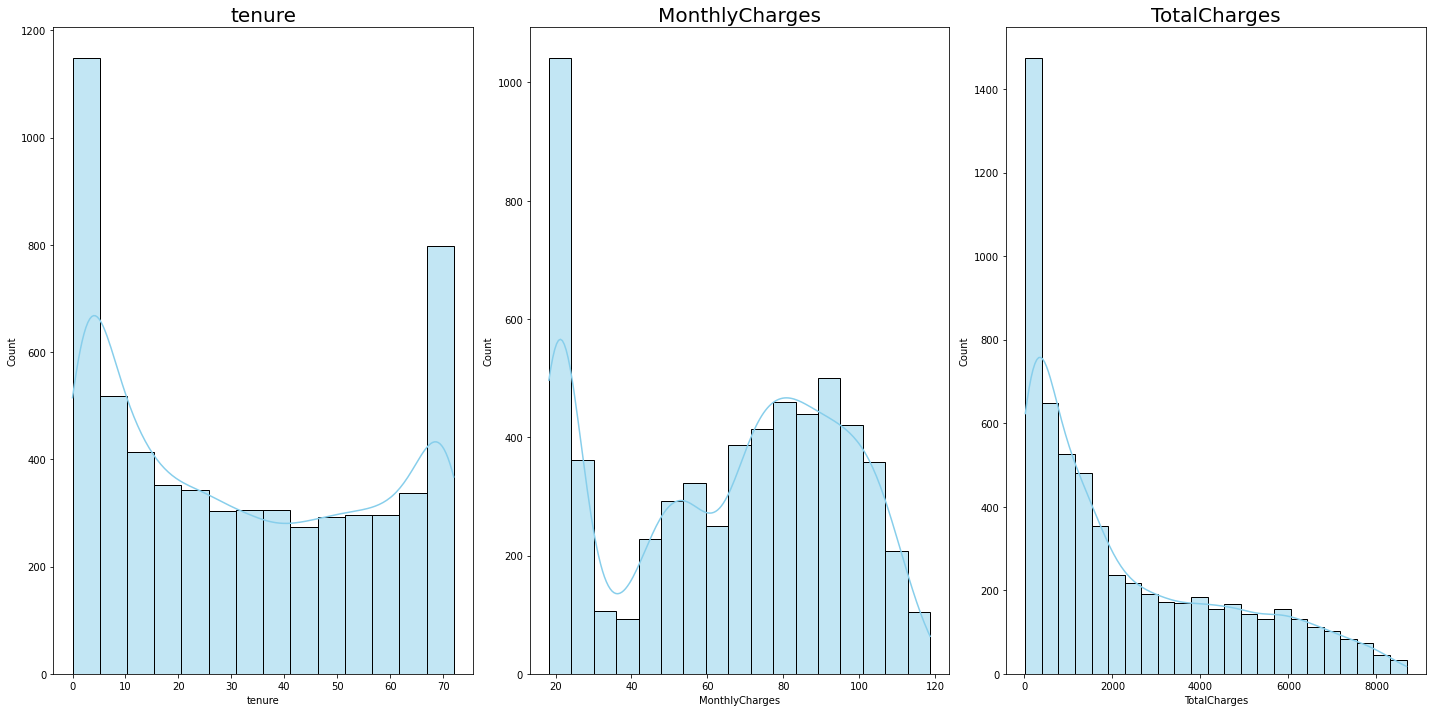

In [7]:
n =1
plt.figure(figsize=(20,10))
for feature in num_val:
  plt.subplot(1,3,n);
  sns.histplot(df[feature],kde=True,color='skyblue');
  plt.title(feature,size=20)
  n =n +1 

plt.tight_layout()
plt.show()

### As we can see TotalCharges feature is right skewed  and other feature approx Normal distribution.

### I will handle this distribution latter

## Checking for Correlation between features

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

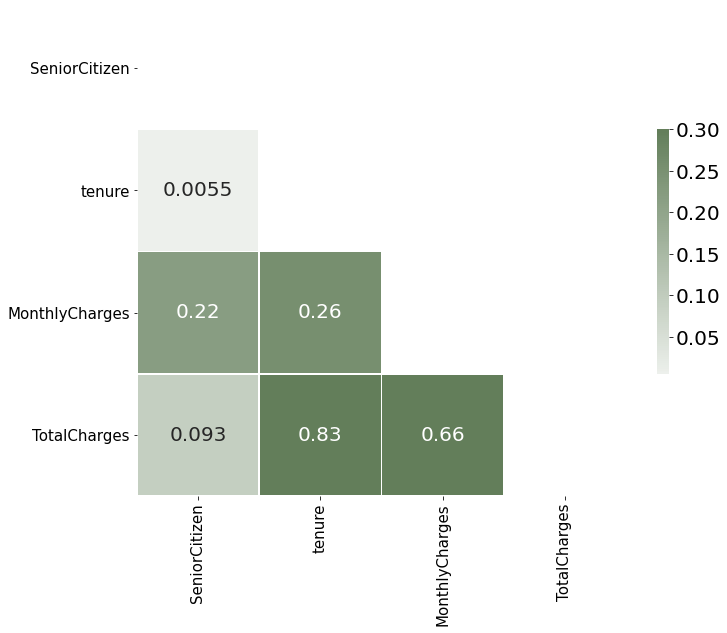

In [ ]:
# Correlation 
corr= df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 120,40, as_cmap=True,)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);
plt.xticks(size=15)
plt.yticks(size=15)

### As we can see 
### 87% correlation between TotalCharges and tenure 
### 62% Correlation between TotalCharges & MonthlyCharges

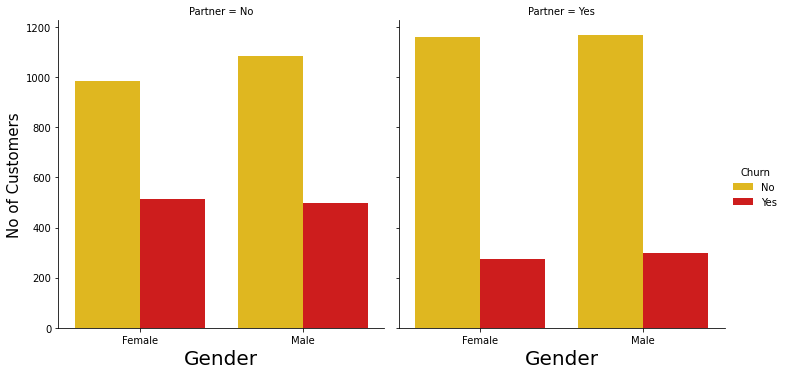

In [ ]:
z= df.groupby(['gender','Partner','Churn'])['customerID'].count().reset_index()
g= sns.catplot(x='gender', y='customerID',kind='bar',col= 'Partner',hue='Churn', data=z,palette='hot_r')
g.set_xlabels('Gender',size=20)
g.set_ylabels("No of Customers",size=15)

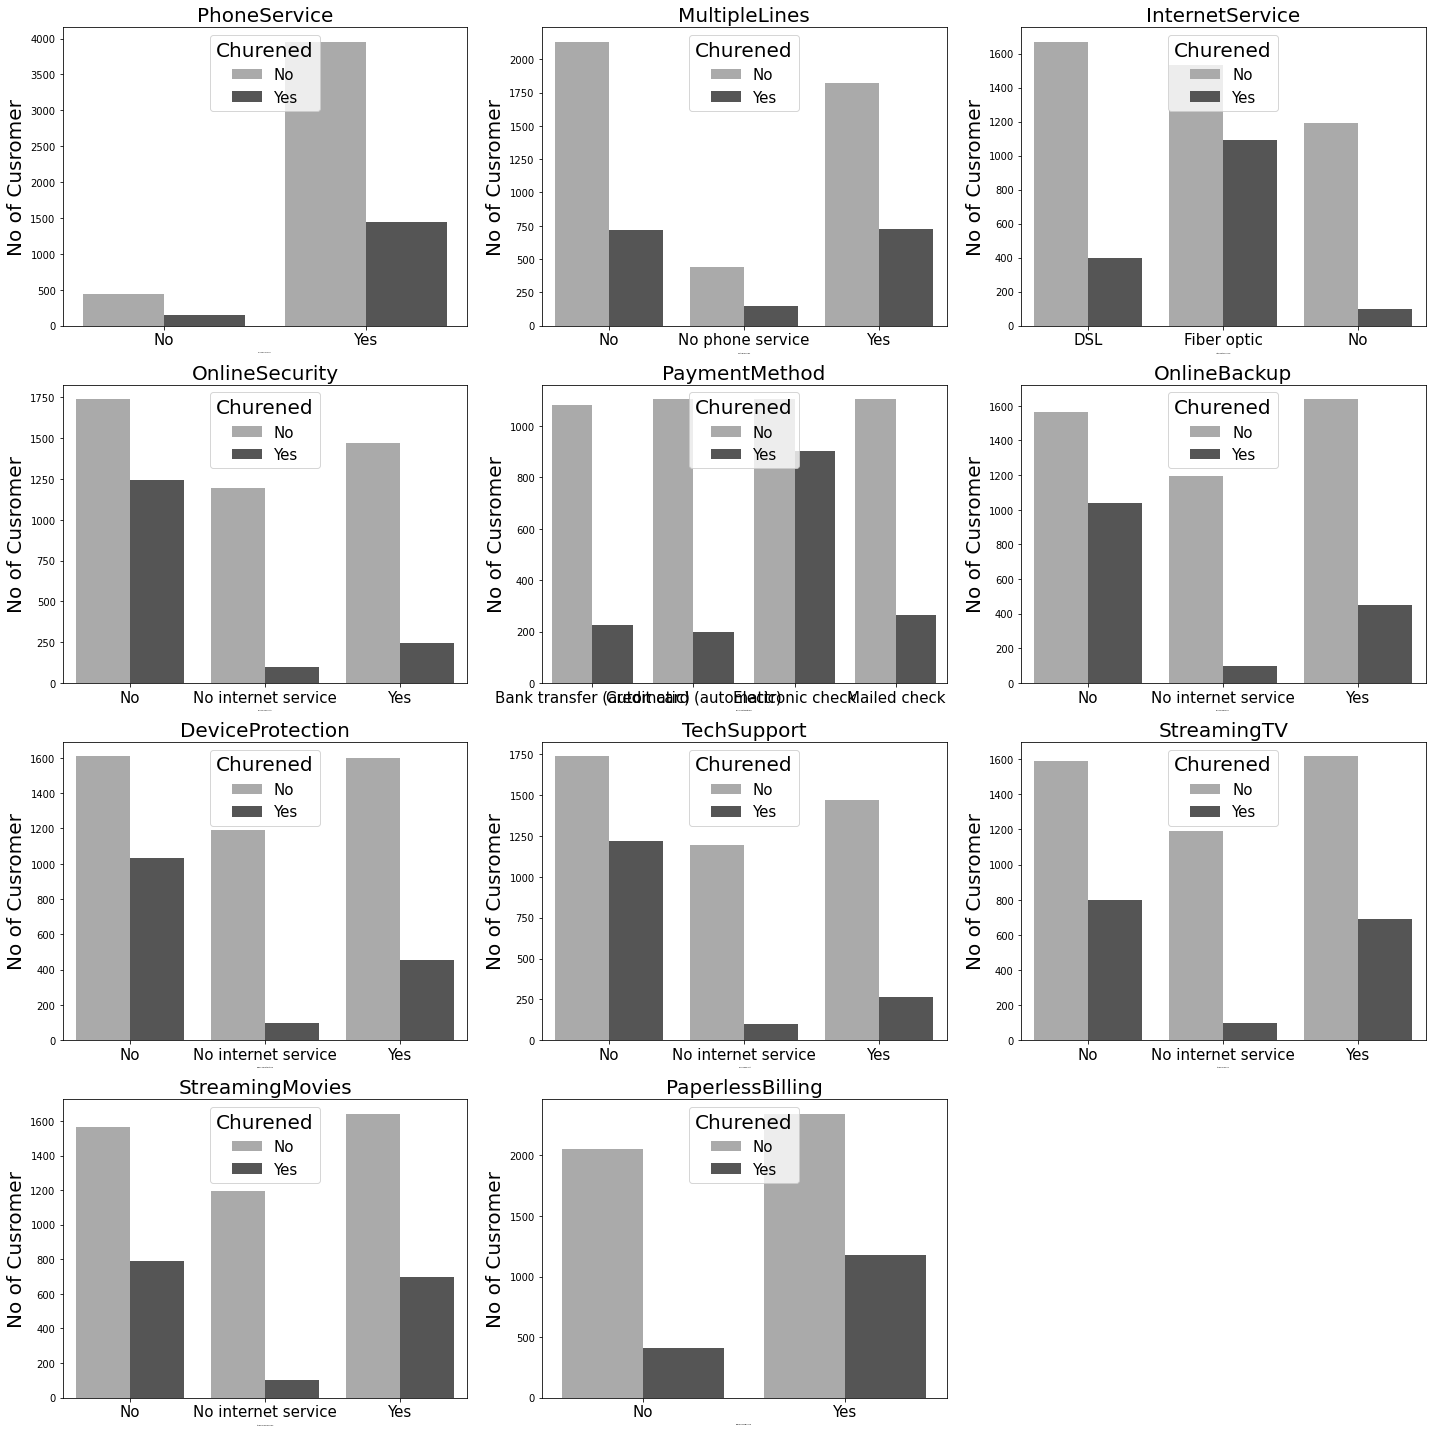

In [23]:
services= ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','PaymentMethod','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
n= 1
plt.figure(figsize=(20,20))
for feature in services:

  plt.subplot(4,3,n)
  z= df.groupby([feature, 'Churn'])['customerID'].count().reset_index()
  #z= z.pivot_table(values='customerID', columns='Churn',index= [feature])
  #z.plot(kind='bar', stacked=True,figsize=(5,4))
  sns.barplot(x=feature, y='customerID', hue='Churn', data=z,palette='gist_gray_r')
  plt.title(feature,size=20)
  plt.xlabel(feature, size=2)
  plt.ylabel("No of Cusromer", size=20)
  plt.xticks(size=15)
  plt.legend(loc='upper center', title='Churened', fontsize=15,title_fontsize=20)
  n = n +1

plt.tight_layout()
plt.show()

## As we can see Lots of customers are churning.Need to find why?

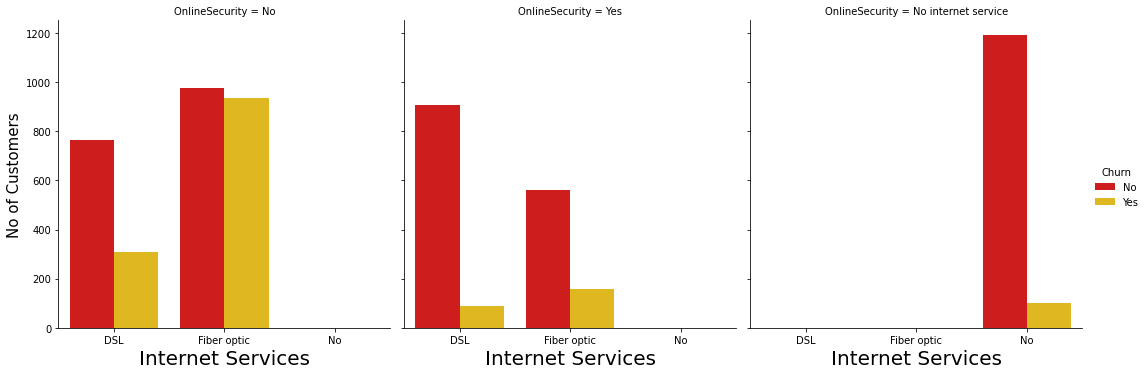

In [ ]:
z= df.groupby(['InternetService', 'OnlineSecurity','Churn'])['customerID'].count().reset_index()
z.columns = ['InternetService', 'OnlineSecurity','Churn', 'No of Customers']
g= sns.catplot(x='InternetService', y= 'No of Customers',hue='Churn', col='OnlineSecurity', data =z,kind='bar',palette='hot');
g.set_xlabels('Internet Services',size=20)
g.set_ylabels("No of Customers",size=15)


### From the above data we can see Customer who have taken Internet Service called Fiber Optics service and haven't taken any  Online Security they are churning more. May be Price of Online Security is very high and they can't afford it.

<Figure size 2880x720 with 0 Axes>

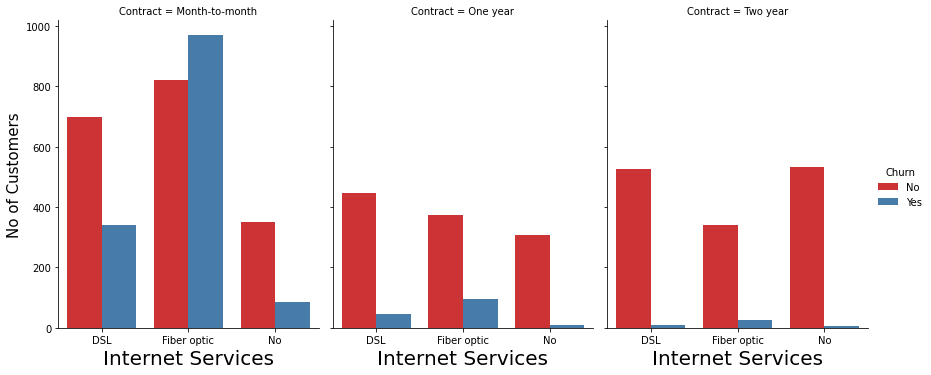

In [ ]:
z= df.groupby(['InternetService','Contract', 'Churn'])['customerID'].count().reset_index()
plt.figure(figsize=(40,10))
cat_plot= sns.catplot(x='InternetService', y='customerID',kind='bar', hue='Churn', col='Contract'
                      ,height=5, aspect=.8,data=z,palette='Set1',)
cat_plot.set_xlabels('Internet Services',size=20)
cat_plot.set_ylabels("No of Customers",size=15)


### from the above plot we can see Customer who have Month to month contract they are churning more

## Need to dig more deeper why customers are churning?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


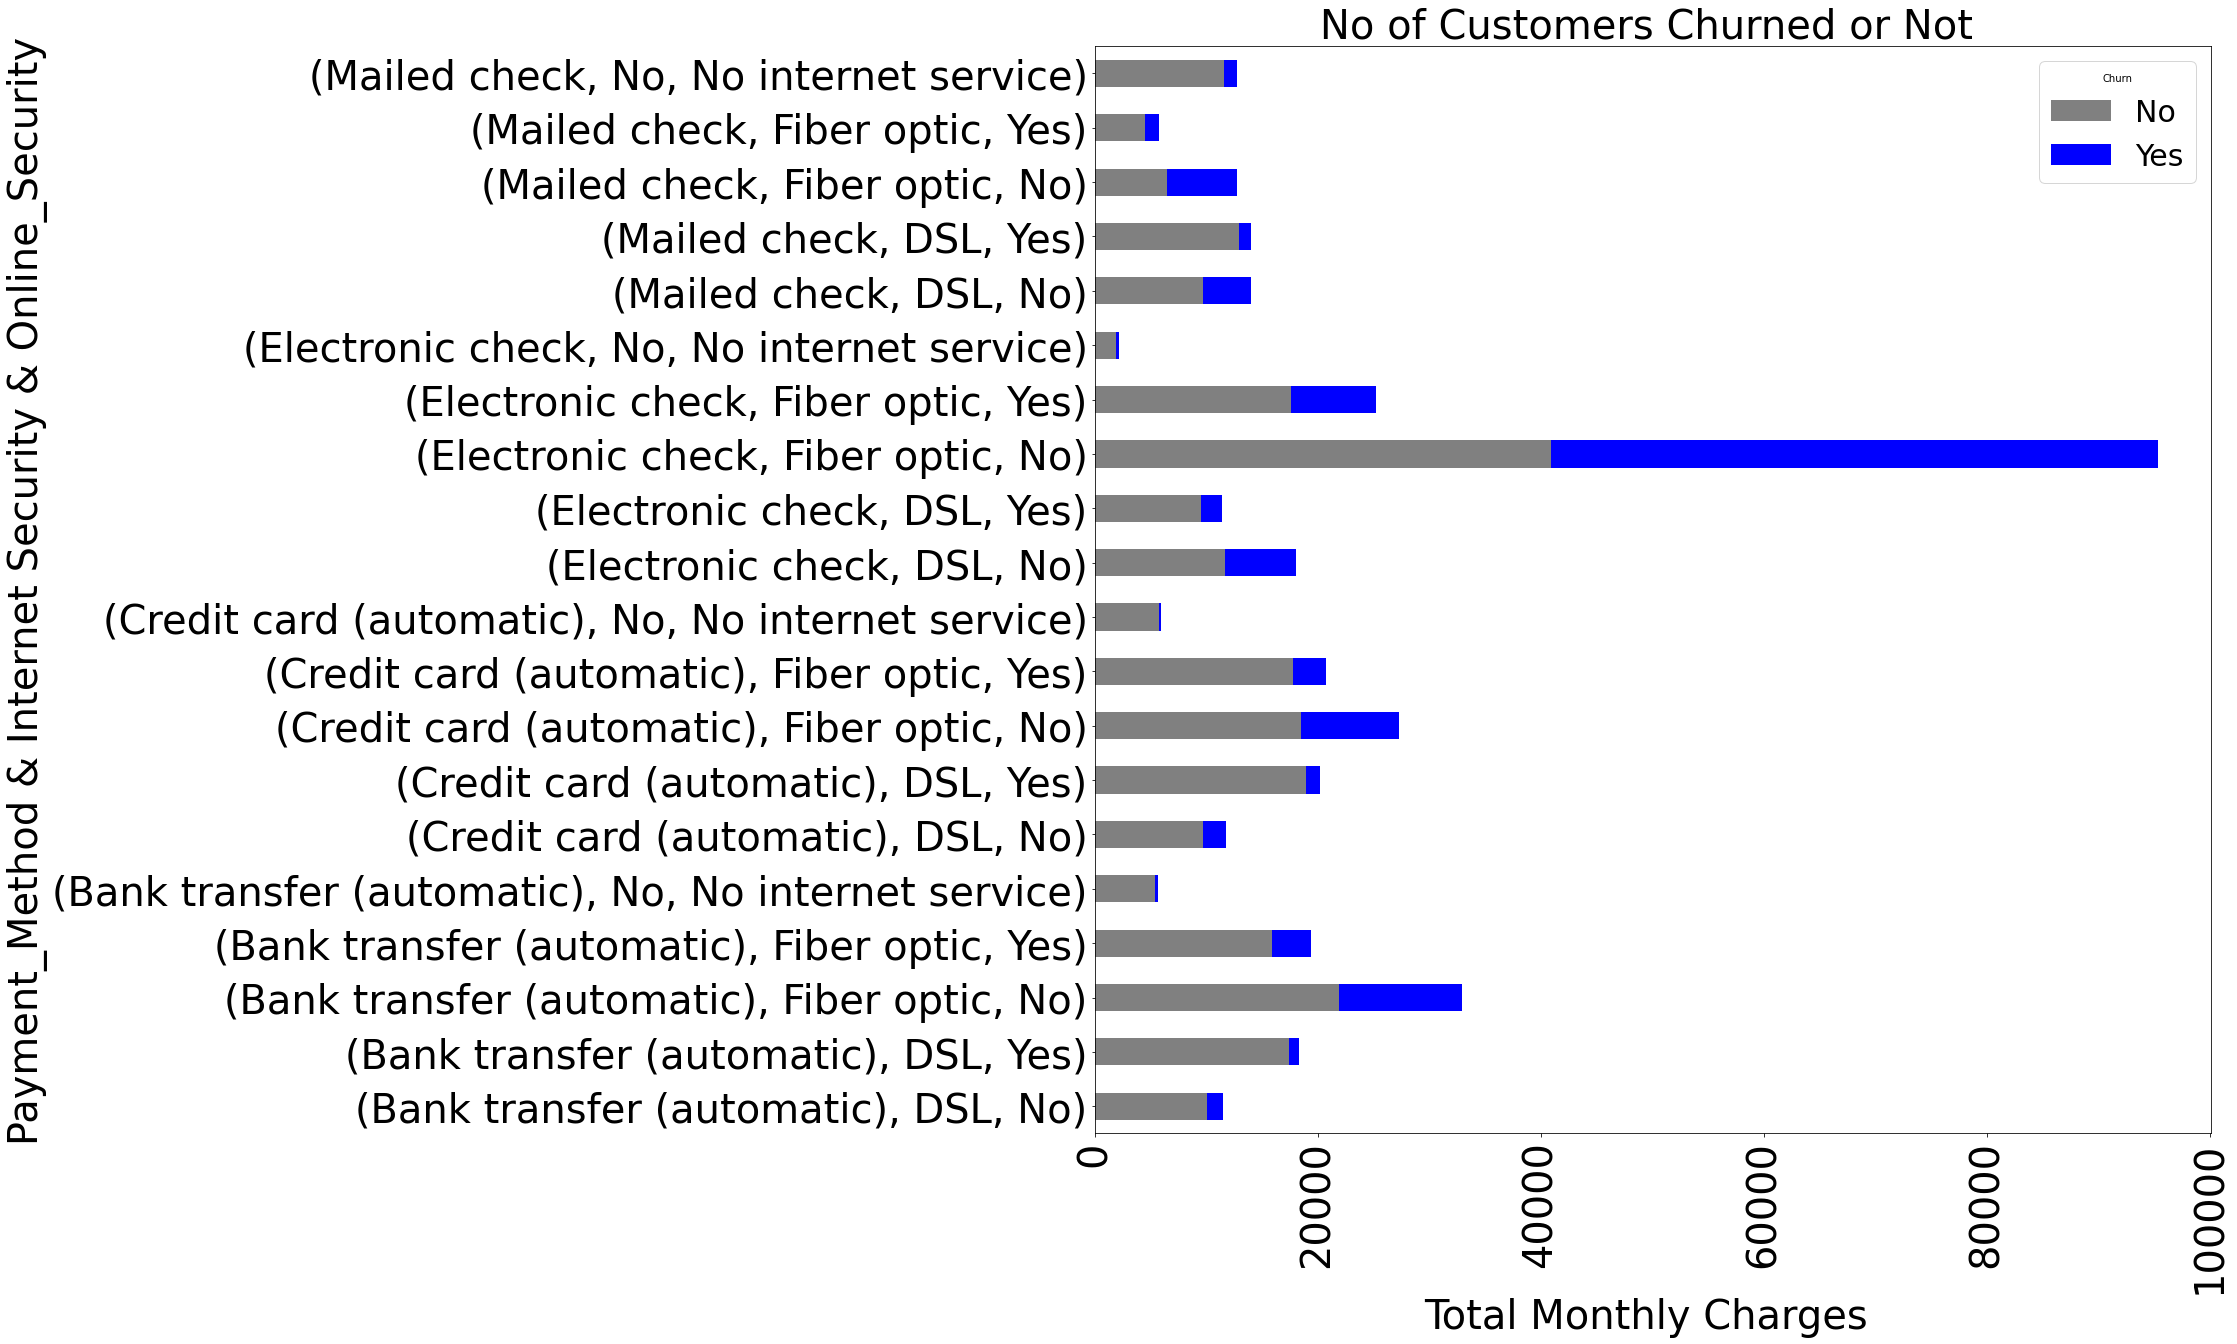

In [ ]:
z= df.groupby(['InternetService', 'OnlineSecurity', 'PaymentMethod', 'Churn'])['MonthlyCharges','TotalCharges' ].sum().reset_index()
z= z.pivot_table(values='MonthlyCharges', index=['PaymentMethod','InternetService', 'OnlineSecurity' ],columns='Churn')

z.plot(kind='barh', stacked=True,figsize=(20,20), color=['grey','blue'])
plt.title("No of Customers Churned or Not ", size=40)
plt.ylabel("Payment_Method & Internet Security & Online_Security", size=40)
plt.xlabel("Total Monthly Charges ", size=40)
plt.xticks(rotation=90,size=40)
plt.yticks(size=40)
plt.legend(loc='upper right', title='Churn', fontsize=30)
plt.show()

### conclusion :- Customer who are paying monthly bills through Elctronic check they had to pay monthly bills more even they are not using any internet security. So these type of customers are churning more.

<Figure size 1440x720 with 0 Axes>

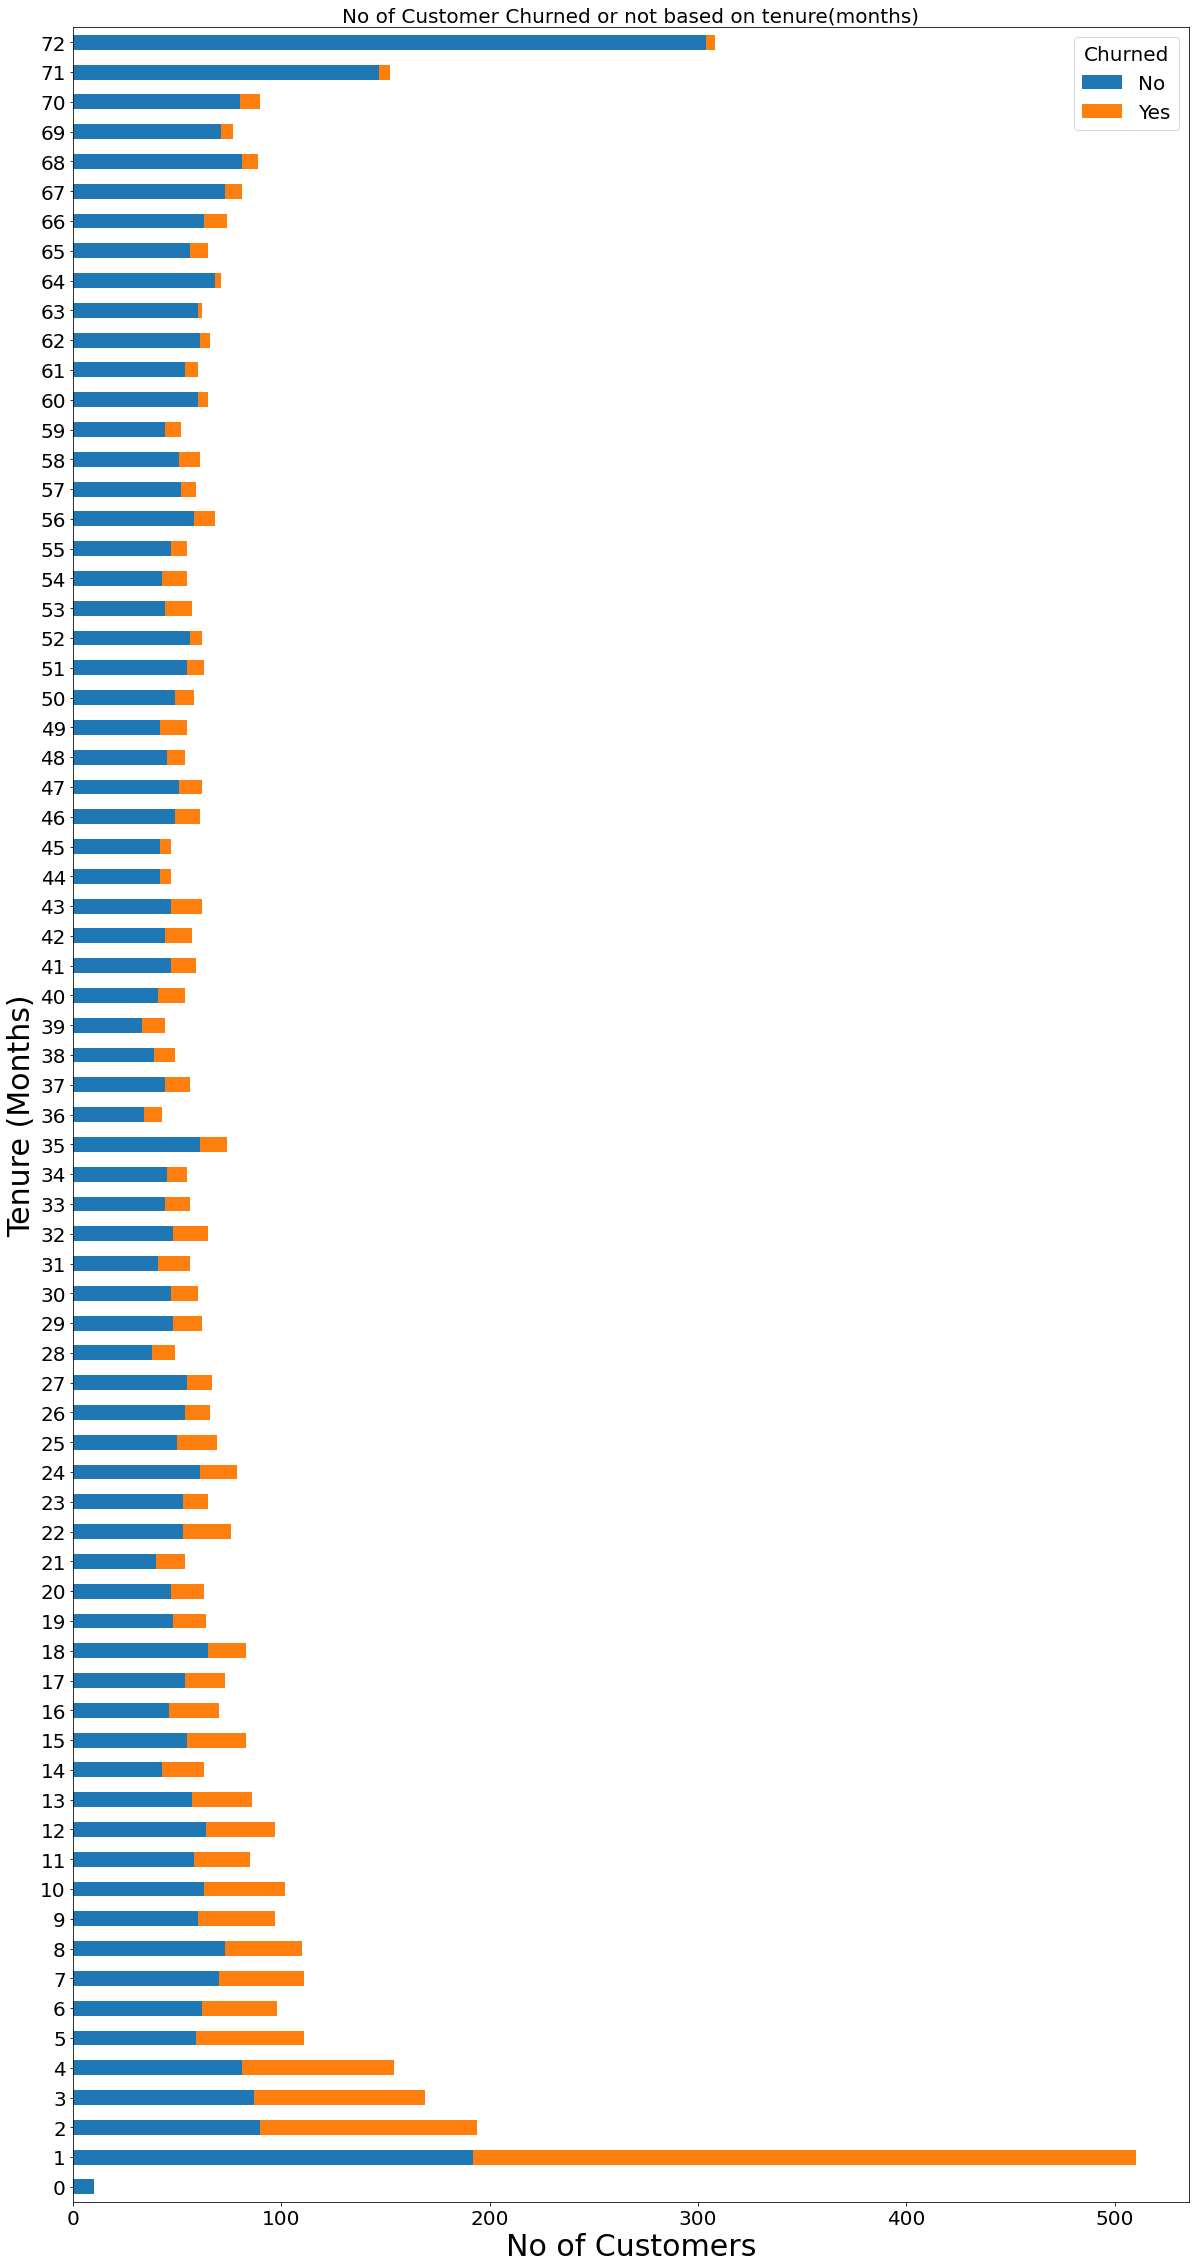

In [24]:
z= df.groupby(["tenure",'Churn'])['customerID'].count().reset_index()
z= z.pivot_table(values='customerID', index='tenure', columns='Churn',fill_value=0)
plt.figure(figsize=(20,10))
z.plot(kind='barh',stacked=True,figsize=(20,40))
plt.title("No of Customer Churned or not based on tenure(months)",size=20)
plt.ylabel("Tenure (Months)",size=30)
plt.xlabel("No of Customers",size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(loc='upper right', fontsize=20, title='Churned', title_fontsize=20)
plt.show()

## From the above plot we can say that :--
### As the tenure is less customers churned more.
### So large tenure, customers  churning frquency is very less

## I am done with  EDA part. I will buid a genearlised model which will predict which customers will Churn or which one is not. 

## Handling the Outliers using BoxCox

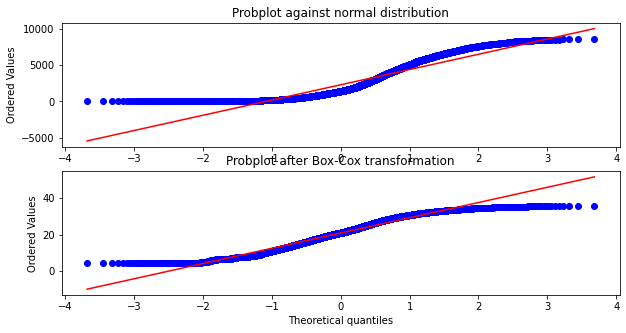

In [ ]:
from scipy import stats
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)

prob = stats.probplot(df['TotalCharges'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(df['TotalCharges'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

## Applying BoxCox transmission on TotalCharge column

In [ ]:
df['TotalCharges'] = xt

# Feature Engineering

In [ ]:
# Find how many class the categorical columns contains
for feature in cat_val:
  number = df[feature].nunique()
  print("{}  :".format(feature), number)

gender  : 2
SeniorCitizen  : 2
Partner  : 2
Dependents  : 2
PhoneService  : 2
MultipleLines  : 3
InternetService  : 3
OnlineSecurity  : 3
OnlineBackup  : 3
DeviceProtection  : 3
TechSupport  : 3
StreamingTV  : 3
StreamingMovies  : 3
Contract  : 3
PaperlessBilling  : 2
PaymentMethod  : 4
Churn  : 2


## Because Columns doen't contains many no of categories. I will perform OneHot Encoding

In [ ]:
cat_df= pd.get_dummies(df[cat_val],drop_first=True)
cat_df.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
1869,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
4528,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
6344,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6739,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
432,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## Change the datatype of Numerical columns

In [ ]:
for feature in num_val:
  df[feature] = df[feature].astype('int')

## Concatenate Numerical and dummy features

In [ ]:
new_df= pd.concat([df[num_val],cat_df],axis=1)
# Extract the relevant columns in new dataframe
customer_id= df['customerID']
target = df['Churn']

In [ ]:
X= new_df.drop('Churn_Yes',axis=1)
Y = new_df['Churn_Yes']

## Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Split data to training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25)

# Check the shape of dataset
print(train_X.shape,test_X.shape, train_Y.shape, test_Y.shape)

(4489, 30) (1497, 30) (4489,) (1497,)


## Scaling the dataset using Standard Scaler

In [ ]:
# Import StandardScaler library
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler instance
scaler = StandardScaler()
# Fit the training dataset
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)


## Build different model on training set

Log-Loss for Logistic Regression 6.732384322290724
ROC-AUC Score 0.71795472818512


Classification report for :::-- Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3279
           1       0.68      0.53      0.59      1210

    accuracy                           0.81      4489
   macro avg       0.76      0.72      0.73      4489
weighted avg       0.80      0.81      0.80      4489





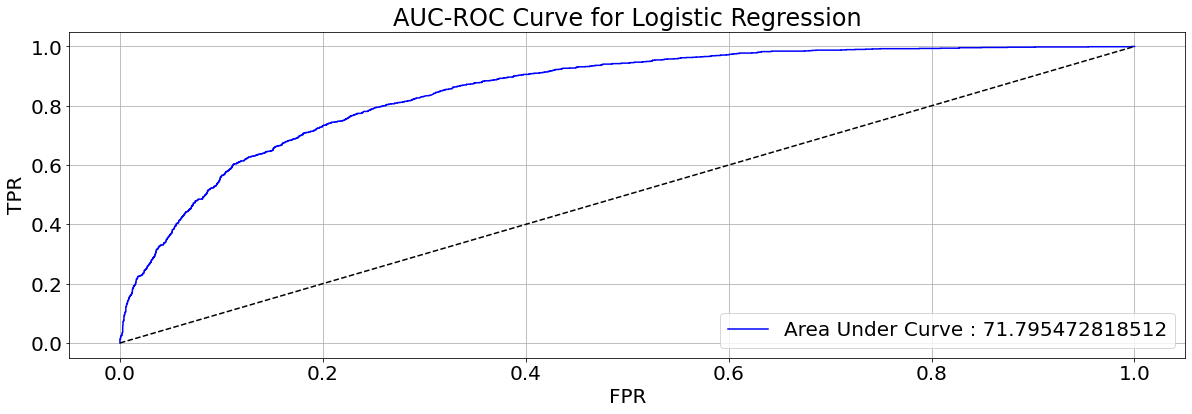

Log-Loss for K Nearest Neighbours 5.955285363603342
ROC-AUC Score 0.7659479684140751


Classification report for :::-- K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3279
           1       0.70      0.63      0.66      1210

    accuracy                           0.83      4489
   macro avg       0.78      0.77      0.77      4489
weighted avg       0.82      0.83      0.82      4489





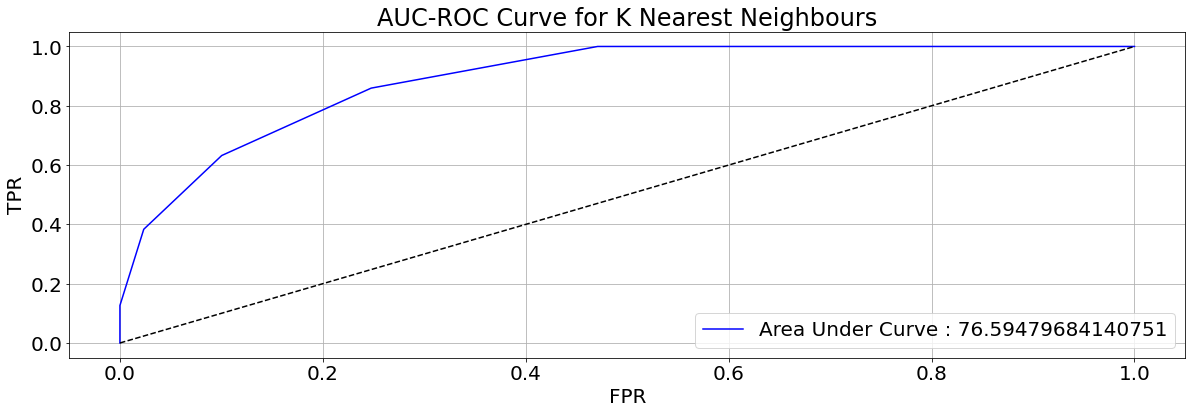

Log-Loss for Decision Tree 0.3308475342744565
ROC-AUC Score 0.9845780435982548


Classification report for :::-- Decision Tree
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3279
           1       0.99      0.97      0.98      1210

    accuracy                           0.99      4489
   macro avg       0.99      0.98      0.99      4489
weighted avg       0.99      0.99      0.99      4489





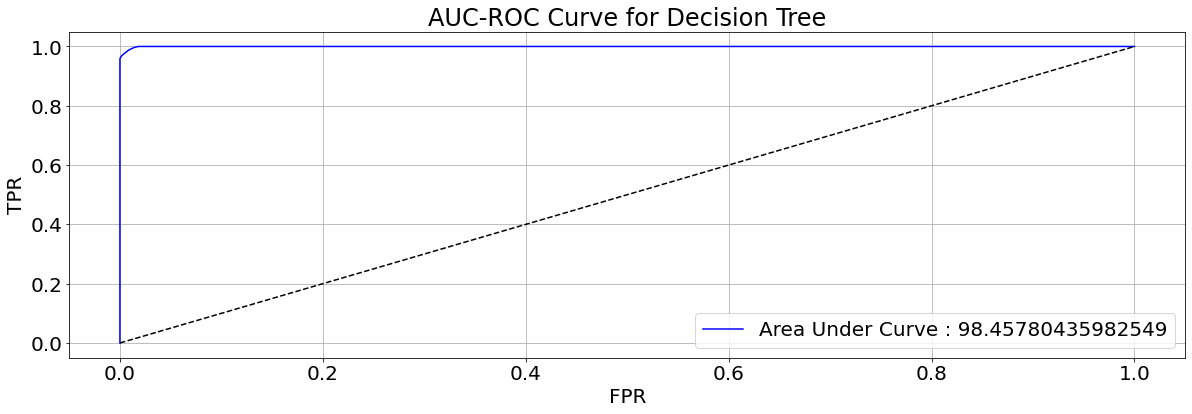

Log-Loss for SVM_Classifier 6.124540590625247
ROC-AUC Score 0.735215836313732


Classification report for :::-- SVM_Classifier
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3279
           1       0.73      0.55      0.62      1210

    accuracy                           0.82      4489
   macro avg       0.79      0.74      0.75      4489
weighted avg       0.81      0.82      0.81      4489





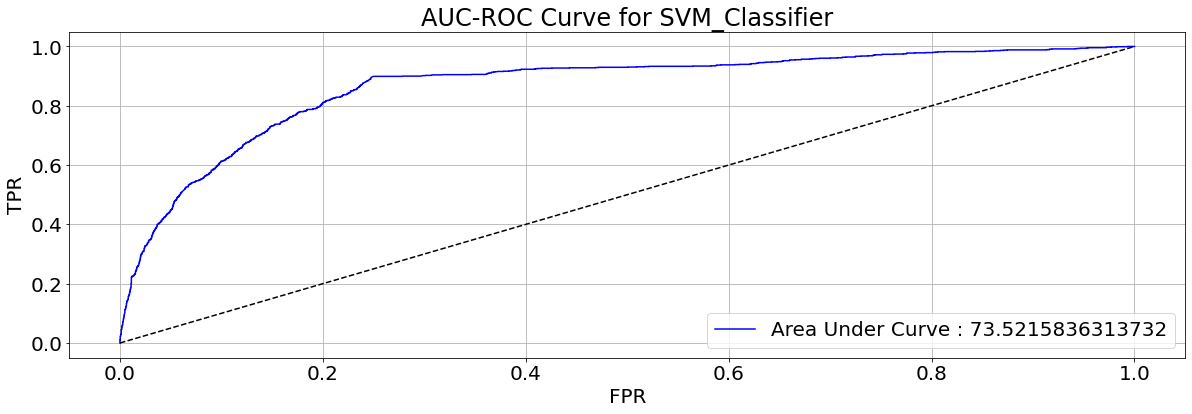

Log-Loss for Random_Forest 3.3315517389284586
ROC-AUC Score 0.8359364248826114


Classification report for :::-- Random_Forest
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3279
           1       0.94      0.69      0.79      1210

    accuracy                           0.90      4489
   macro avg       0.92      0.84      0.87      4489
weighted avg       0.91      0.90      0.90      4489





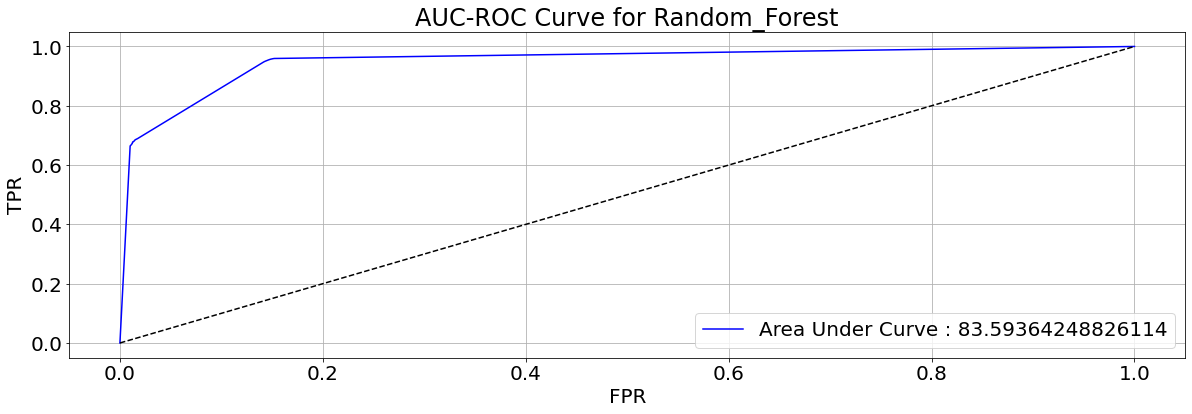

In [ ]:



# Set seed for reproducibility
SEED = 1


# Instantiate individual classifiers

classifier = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=SEED)
svm_class= SVC(kernel='rbf',probability=True,random_state=SEED)
RF_classifier = RandomForestClassifier(n_estimators = 2, criterion = 'entropy', random_state = 0)

# Define a list called classifier that contains the tuples (classifier_name, classifier)

classifiers = [('Logistic Regression', classifier), ('K Nearest Neighbours', knn), ('Decision Tree', dt),('SVM_Classifier', svm_class),
               ('Random_Forest', RF_classifier)]

# Iterate over the defined list of tuples containing the classifiers

for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(train_X,train_Y)
    
    # Predict the labels of the training set
    x_pred_prob = clf.predict_proba(train_X)[:1]
    x_pred = clf.predict(train_X)
    # Print the metrics

    print("Log-Loss for {}".format(clf_name), log_loss(train_Y,x_pred))
    print("ROC-AUC Score",roc_auc_score(train_Y,x_pred))
    print('\n')
    print("Classification report for :::-- {}".format(clf_name)) 
    print(classification_report(train_Y,x_pred))
    print("\n")
    
    fpr, tpr, _ = roc_curve(train_Y, clf.predict_proba(train_X)[:,1])
    plt.figure(figsize=(20,6))
    score= roc_auc_score(train_Y,x_pred)
    plt.plot(fpr,tpr,label="Area Under Curve : {}".format(score*100),color='blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("AUC-ROC Curve for {}".format(clf_name))
    plt.xlabel("FPR",size=20)
    plt.ylabel("TPR", size=20)
    plt.legend(loc=4)
    plt.grid()
    plt.show()

### As we know DT gives Overfitting result, need to do CV 

## Choosing Optimal value of C

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
C = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C
for index in range(0, len(C)):
  logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
  logreg.fit(train_X,train_Y)
  pred_train_Y = logreg.predict(train_X)
  l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
  l1_metrics[index,2] = accuracy_score(train_Y, pred_train_Y)
  l1_metrics[index,3] = precision_score(train_Y, pred_train_Y)
  l1_metrics[index,4] = recall_score(train_Y, pred_train_Y)
col_names = ['C','Non-Zero Coeffs','Accuracy','Precision','Recall']
print(pd.DataFrame(l1_metrics, columns=col_names))

        C  Non-Zero Coeffs  Accuracy  Precision    Recall
0  1.0000             26.0  0.804411   0.675847  0.527273
1  0.5000             24.0  0.805302   0.677966  0.528926
2  0.2500             28.0  0.807084   0.682590  0.531405
3  0.1000             27.0  0.806638   0.684267  0.524793
4  0.0500             24.0  0.806416   0.685932  0.519835
5  0.0250             22.0  0.805747   0.689038  0.509091
6  0.0100             14.0  0.796837   0.675294  0.474380
7  0.0050             10.0  0.784807   0.675793  0.387603
8  0.0025              3.0  0.761417   0.730897  0.181818


## I will choose C=0.25

## RandomSearchCV in Logistic regression to see what is the Optimal value of C

In [ ]:

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
tolerance= [0.0001,0.0003,0.0004,0.004,0.005,0.006,0.0009,0.01,0.002]
#class_weight_options = ['None', 'balanced']
c= [0.1,0.2,0.4,0.6,0.8,0.9,1,1.5,1.7,1.9,2,2.3,2.6,2.9,3]
param_grid = dict(solver = solver_options,
                  tol=tolerance,
                  multi_class = multi_class_options, 
                  #class_weight = class_weight_options,
                  C=c)

lr = LogisticRegression()
random = RandomizedSearchCV(lr, param_grid, cv=20, scoring = 'roc_auc',n_jobs=-1)
random.fit(train_X,train_Y)
Y_pred= random.predict(train_X)

print("RandomSearchCV on Logistic regression")
print("\n")
print("RandomSearchCV score" ,random.score(train_X,Y_pred))
print("Best Parameters :", random.best_params_)
print("Precision Score", precision_score(train_Y,Y_pred))
print("Recall Score", recall_score(train_Y,Y_pred))
print("\n")
print("Classification report for Logistic Regression") 
print(classification_report(train_Y,Y_pred))

RandomSearchCV on Logistic regression


RandomSearchCV score 1.0
Best Parameters : {'tol': 0.0004, 'solver': 'newton-cg', 'multi_class': 'multinomial', 'C': 0.2}
Precision Score 0.6786850477200425
Recall Score 0.5289256198347108


Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3279
           1       0.68      0.53      0.59      1210

    accuracy                           0.81      4489
   macro avg       0.76      0.72      0.73      4489
weighted avg       0.80      0.81      0.80      4489



## As we can see RandomSearchCV chooses C=0.2

# RandomSearch in Decision Tree

In [ ]:

dt = DecisionTreeClassifier()
## ccp_alpha controls the pruning of tree
###  number of nodes and tree depth decreases as alpha increases
parameters = { 
           "criterion"         : ["gini", "entropy"],
           
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "max_features"      : [3, 5],
           "ccp_alpha": [0.0001,0.0003,0.0004,0.0006,0.0008,0.001,0.003,0.004,0.006,0.008,0.01,0.04,0.06,0.07,0.1,0.3,0.8]}
random_dt= RandomizedSearchCV(estimator= dt, param_distributions= parameters, n_jobs=-1, cv=20)

random_dt.fit(train_X,train_Y)
Y_pred= random_dt.predict(train_X)

print("RandomSearchCV on Decision Tree")
print("\n")
print("RandomSearchCV score" ,random_dt.score(train_X,Y_pred))
print("Best Parameters :", random_dt.best_params_)
print("Precision Score", precision_score(train_Y,Y_pred))
print("Recall Score", recall_score(train_Y,Y_pred))
print("\n")
print("Classification report for Decision Tree") 
print(classification_report(train_Y,Y_pred))

RandomSearchCV on Decision Tree


RandomSearchCV score 1.0
Best Parameters : {'min_samples_split': 2, 'max_features': 5, 'max_depth': 10, 'criterion': 'entropy', 'ccp_alpha': 0.001}
Precision Score 0.6774193548387096
Recall Score 0.503305785123967


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3279
           1       0.68      0.50      0.58      1210

    accuracy                           0.80      4489
   macro avg       0.76      0.71      0.72      4489
weighted avg       0.79      0.80      0.79      4489



## Random Search on RandomForest

In [ ]:

rf= RandomForestClassifier()
## ccp_alpha controls the pruning of tree
###  number of nodes and tree depth decreases as alpha increases
parameters = { "n_estimators"      : [250, 300],
           "criterion"         : ["gini", "entropy"],
           
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "max_features"      : [3, 5],
           "ccp_alpha": [0.0001,0.0003,0.0004,0.0006,0.0008,0.001,0.003,0.004,0.006,0.008,0.01,0.04,0.06,0.07,0.1,0.3,0.8],
           "bootstrap": [True, False]}
random_dt= RandomizedSearchCV(estimator= rf, param_distributions= parameters, n_jobs=-1, cv=20)

random_dt.fit(train_X,train_Y)
Y_pred= random_dt.predict(train_X)

print("RandomSearchCV on RandomForest")
print("\n")
print("RandomSearchCV score" ,random_dt.score(train_X,Y_pred))
print("Best Parameters :", random_dt.best_params_)
print("Precision Score", precision_score(train_Y,Y_pred))
print("Recall Score", recall_score(train_Y,Y_pred))

print("ROC-AUC Score",roc_auc_score(train_Y,x_pred))
print('\n')
print("Classification report for RF") 
print(classification_report(train_Y,Y_pred))

RandomSearchCV on RandomForest


RandomSearchCV score 1.0
Best Parameters : {'n_estimators': 250, 'min_samples_split': 2, 'max_features': 3, 'max_depth': 10, 'criterion': 'entropy', 'ccp_alpha': 0.0008, 'bootstrap': False}
Precision Score 0.7386759581881533
Recall Score 0.5256198347107438
ROC-AUC Score 0.8359364248826114


Classification report for RF
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3279
           1       0.74      0.53      0.61      1210

    accuracy                           0.82      4489
   macro avg       0.79      0.73      0.75      4489
weighted avg       0.81      0.82      0.81      4489



## F1-Score is maximum for RandomSearchCV of RandomForest

## Bagging Classifier on RF

In [ ]:

SEED =1

rf = RandomForestClassifier(criterion='entropy', max_depth= 10, max_features=3,
                            min_samples_split=2,n_estimators=250,
                            ccp_alpha=0.0008,random_state=SEED)

# Initiate the Bagging classifer

bc =  BaggingClassifier(base_estimator= rf, n_estimators=100)

# Fit 'bc' to training set
bc.fit(train_X,train_Y)


Y_pred= bc.predict(train_X)

print("Bagging on RandomForest")
print("\n")
print("Precision Score", precision_score(train_Y,Y_pred))
print("Recall Score", recall_score(train_Y,Y_pred))

print("ROC-AUC Score",roc_auc_score(train_Y,Y_pred))
print('\n')
print("Classification report for RF") 
print(classification_report(train_Y,Y_pred))

Bagging on RandomForest


Precision Score 0.7659817351598174
Recall Score 0.551355792933443
ROC-AUC Score 0.7443514905987508


Classification report for RF
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3272
           1       0.77      0.55      0.64      1217

    accuracy                           0.83      4489
   macro avg       0.81      0.74      0.77      4489
weighted avg       0.83      0.83      0.82      4489



## Predicting the test set result

In [ ]:
test_pred= bc.predict(test_X)

print("Bagging with Random Forest")
print("\n")
print("Precision Score", precision_score(test_Y,test_pred))
print("Recall Score", recall_score(test_Y,test_pred))

print("ROC-AUC Score",roc_auc_score(test_Y,test_pred))
print('\n')
print("Classification report for test dataset") 
print(classification_report(test_Y,test_pred))

Bagging with Random Forest


Precision Score 0.6804123711340206
Recall Score 0.5351351351351351
ROC-AUC Score 0.7263075853137965


Classification report for test dataset
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1127
           1       0.68      0.54      0.60       370

    accuracy                           0.82      1497
   macro avg       0.77      0.73      0.74      1497
weighted avg       0.81      0.82      0.82      1497



## As we can see Bagging on RF haven't much effect on the F1-Score

## Bagging on Logistic Regression

In [ ]:
# Initiate Random Forest Classifer

SEED =1

lr= LogisticRegression(tol=0.0004,solver='newton-cg',multi_class='multinomial',C=0.2)


# Initiate the Bagging classifer

bc =  BaggingClassifier(base_estimator= lr, n_estimators=100)

# Fit 'bc' to training set
bc.fit(train_X,train_Y)


Y_pred= bc.predict(train_X)

print("Bagging on Logistic Regression ")
print("\n")
print("Precision Score", precision_score(train_Y,Y_pred))
print("Recall Score", recall_score(train_Y,Y_pred))

print("ROC-AUC Score",roc_auc_score(train_Y,x_pred))
print('\n')
print("Classification report for Logistic Regression") 
print(classification_report(train_Y,Y_pred))

Bagging on Logistic Regression 


Precision Score 0.6776595744680851
Recall Score 0.5264462809917355
ROC-AUC Score 0.8359364248826114


Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3279
           1       0.68      0.53      0.59      1210

    accuracy                           0.80      4489
   macro avg       0.76      0.72      0.73      4489
weighted avg       0.80      0.80      0.80      4489



## Predicting the Test set

In [ ]:
test_pred= bc.predict(test_X)

print("Bagging with Logistic Regression")
print("\n")
print("Precision Score", precision_score(test_Y,test_pred))
print("Recall Score", recall_score(test_Y,test_pred))

print("ROC-AUC Score",roc_auc_score(test_Y,test_pred))
print('\n')
print("Classification report for test dataset") 
print(classification_report(test_Y,test_pred))

Bagging with Logistic Regression


Precision Score 0.7142857142857143
Recall Score 0.5542168674698795
ROC-AUC Score 0.7345945705186736


Classification report for test dataset
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1082
           1       0.71      0.55      0.62       415

    accuracy                           0.81      1497
   macro avg       0.78      0.73      0.75      1497
weighted avg       0.81      0.81      0.81      1497



## AdaBoost on Random Forest

In [ ]:

# Set seed for reproducibility
SEED = 1


# Instantiate a RF-tree 'dt'
rf= RandomForestClassifier(criterion='entropy', max_depth= 10, max_features=3,
                            min_samples_split=2,n_estimators=300,
                            ccp_alpha=0.0008,random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=rf , n_estimators=200)

# Fit 'bc' to training set
adb_clf.fit(train_X,train_Y)


Y_pred= adb_clf.predict(train_X)

print("Bagging on Random Forest")
print("\n")
print("Precision Score", precision_score(train_Y,Y_pred))
print("Recall Score", recall_score(train_Y,Y_pred))

print("ROC-AUC Score",roc_auc_score(train_Y,x_pred))
print('\n')
print("Classification report for Logistic Regression") 
print(classification_report(train_Y,Y_pred))

Bagging on Random Forest


Precision Score 0.9862306368330465
Recall Score 0.9778156996587031
ROC-AUC Score 0.4846280048689089


Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3317
           1       0.99      0.98      0.98      1172

    accuracy                           0.99      4489
   macro avg       0.99      0.99      0.99      4489
weighted avg       0.99      0.99      0.99      4489



## As we can see AdaBoost perform very well after hypertuning on Random Forest

## Let's predict the test dataset

In [ ]:
test_pred= adb_clf.predict(test_X)

print("AdaBoost + Random Forest + Hypertuning")
print("\n")
print("Precision Score", precision_score(test_Y,test_pred))
print("Recall Score", recall_score(test_Y,test_pred))

print("ROC-AUC Score",roc_auc_score(test_Y,test_pred))
print('\n')
print("Classification report based on AdaBoost (Random Forest) for test dataset") 
print(classification_report(test_Y,test_pred))

AdaBoost + Random Forest + Hypertuning


Precision Score 0.6011730205278593
Recall Score 0.4939759036144578
ROC-AUC Score 0.6841413714005745


Classification report based on AdaBoost (Random Forest) for test dataset
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1082
           1       0.60      0.49      0.54       415

    accuracy                           0.77      1497
   macro avg       0.71      0.68      0.69      1497
weighted avg       0.76      0.77      0.76      1497



## It's clear AdaBoost not performing very well

## I will choose Bagging using Logistic Regression because it gives:--
### Maximum Precision =71%
### Recall = 55% and also give very good F1-Score which is 88% on test dataset
### AUC-ROC Score on test set 73%
### AUC-Roc Score on traaining set 88%

### For Saving Customer not to Churn we need to choose good F1-Score model which is a combination of Precision & Recall Score.

### So higher the Recall Score lesser the False Negatives 
### And higher the Precision Score means lesser the False Positives values

# Thank You